In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/My Drive/Mestrado/2021.1/Redes Neurais Artificiais/RNA/')

Mounted at /content/drive


In [ ]:
from models import utils, metrics, plots, pipelineClassifier
from models.classifiers.MLPClassifier import *

import pandas as pd
import numpy as np
import random
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Artificial I

In [ ]:
conjunto_1 = utils.make_coords(coord_limit_x = (2, 4), 
                               coord_limit_y = (8, 10),
                               target= 1,
                               len_set = 50) # Top left


conjunto_2 = utils.make_coords(coord_limit_x = (2,4), 
                               coord_limit_y = (2,4),
                               target= 0, 
                               len_set = 50) # Bottom

conjunto_3 = utils.make_coords(coord_limit_x = (8, 10), 
                               coord_limit_y = (8, 10),
                               target= 0,
                               len_set = 50) # Bottom right

conjunto_4 = utils.make_coords(coord_limit_x = (8, 10), 
                               coord_limit_y = (2, 4),
                               target= 1,
                               len_set = 50) # Bottom right

df_artificial_1 = pd.DataFrame(data= conjunto_2 + conjunto_4 + conjunto_1 + conjunto_3, columns=['x1', 'x2', 'target'])

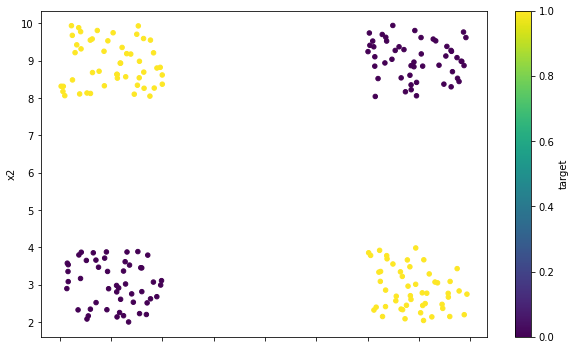

In [ ]:
df_artificial_1.plot.scatter( x='x1', y='x2', c='target', colormap='viridis', figsize=(10,6))

#### Logística

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    
    model_name = 'MLP',
    n_realizations = 20, 
    task='binary_classification',
    func_ativacao_personalizada='logistic'
)

acc_artificial_log, desvio_padrao_artificial_log, realization_select_artificial_log, dict_realizations_artificial_log = pipe.run_realizations(
    
    df=df_artificial_1, 
    k_fold=5, 
    param_grid={'learning_rate': [0.1, 0.01],
                'qt_neurons_hide': [2, 3]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    n_epochs=10000,
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Confusion Matrix: 
[[20.  0.]
 [ 0. 20.]]
Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Confusion Matrix: 
[[20.  0.]
 [ 0. 20.]]
Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Confusion Matrix: 
[[20.  0.]
 [ 0. 20.]]
Taxa de Acerto: 1.0
-------------------------------------------------

In [ ]:
best_perceptron_artificial_log = realization_select_artificial_log['classifier']
best_train_data_log = realization_select_artificial_log['train_data']
best_train_data_log = realization_select_artificial_log['test_data']
taxa_acerto_log = realization_select_artificial_log['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_log}\nDesvio Padrao: {desvio_padrao_artificial_log}')

print('\n- Info best model')
print('Learning rate: ', best_perceptron_artificial_log.learning_rate)
print('qt_neurons_hide: ', best_perceptron_artificial_log.qt_neurons_hide)
print(f'Taxa Acerto: {taxa_acerto_log}')

Artificial
Acurácia: 1.0
Desvio Padrao: 0.0

- Info best model
Learning rate:  0.1
qt_neurons_hide:  3
Taxa Acerto: 1.0


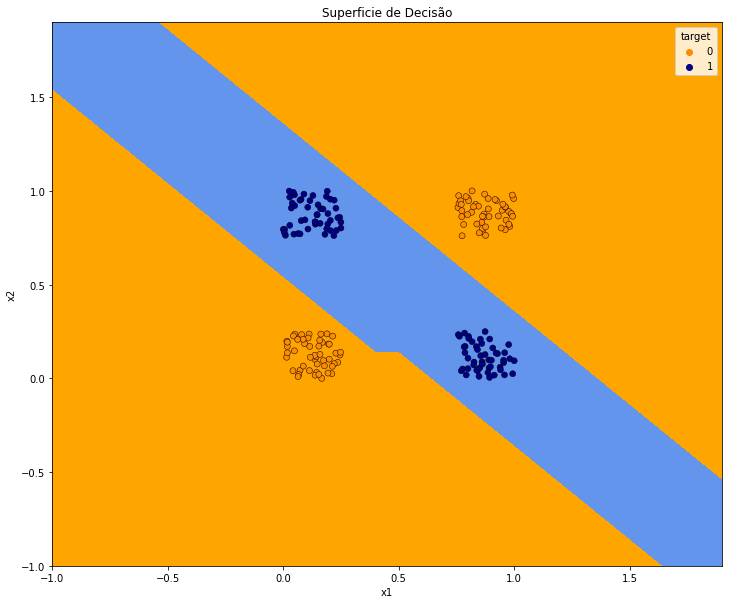

In [ ]:
plots.plot_decision_boundary(
    
    df_artificial_1,
    list_features = ['x1', 'x2'],
    col_target='target',
    model = dict_realizations_artificial_log[0]['classifier'], # Classificador com melhor taxa de acerto
    task = 'binary_classification',
    h=.1
)

#### Tangente

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    
    model_name = 'MLP',
    n_realizations = 20, 
    task='binary_classification',
    func_ativacao_personalizada='tangente'
)

acc_artificial_tan, desvio_padrao_artificial_tan, realization_select_artificial_tan, dict_realizations_artificial_tan = pipe.run_realizations(
    
    df=df_artificial_1, 
    k_fold=5, 
    param_grid={'learning_rate': [0.1, 0.01],
                'qt_neurons_hide': [2, 3]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    n_epochs=10000,
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Confusion Matrix: 
[[12.  8.]
 [ 0. 20.]]
Taxa de Acerto: 0.8
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Confusion Matrix: 
[[12.  8.]
 [ 0. 20.]]
Taxa de Acerto: 0.8
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Confusion Matrix: 
[[12.  8.]
 [ 0. 20.]]
Taxa de Acerto: 0.8
-------------------------------------------------

In [ ]:
best_perceptron_artificial_tan = realization_select_artificial_tan['classifier']
best_train_data_tan = realization_select_artificial_tan['train_data']
best_trest_data_tan = realization_select_artificial_tan['test_data']
taxa_acerto_tan = realization_select_artificial_tan['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_tan}\nDesvio Padrao: {desvio_padrao_artificial_tan}')

print('\n- Info best model')
print('Learning rate: ', best_perceptron_artificial_tan.learning_rate)
print('qt_neurons_hide: ', best_perceptron_artificial_tan.qt_neurons_hide)
print(f'Taxa Acerto: {taxa_acerto_tan}')

Artificial
Acurácia: 0.8
Desvio Padrao: 0.06786208925382962

- Info best model
Learning rate:  0.01
qt_neurons_hide:  3
Taxa Acerto: 0.8


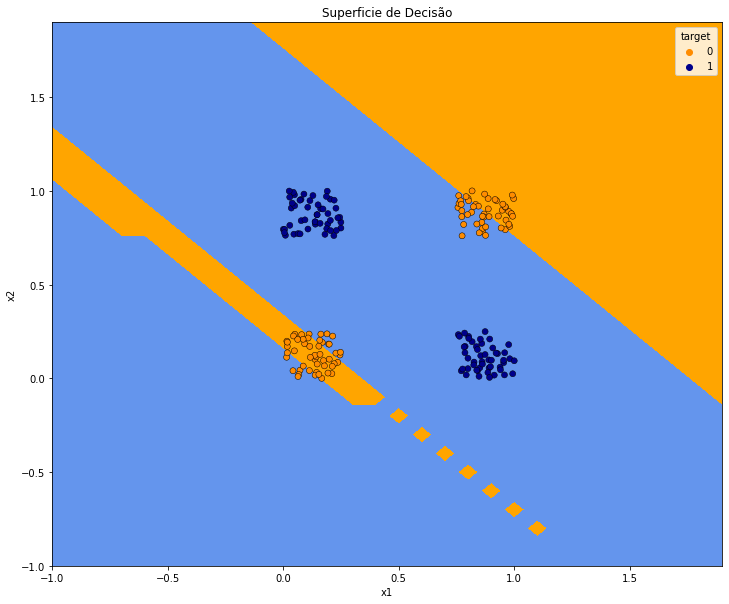

In [ ]:
plots.plot_decision_boundary(
    
    df_artificial_1,
    list_features = ['x1', 'x2'],
    col_target='target',
    model = dict_realizations_artificial_tan[6]['classifier'],
    task = 'binary_classification',
    h=.1
)